In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
veri = pd.read_csv("veriseti_20220203_olimpiyatlar.csv")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Veri Temizliği

Sütun İsimlerinin Düzenlenmesi

In [4]:
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
# Sütun isimlerinin değiştirilmesi
veri.rename(columns={'ID'    : 'id',
                      'Name'  : 'isim',
                      'Gender': 'cinsiyet',
                      'Age'   : 'yas',
                      'Height': 'boy',
                      'Weight': 'kilo',
                      'Team'  : 'takim',
                      'NOC'   : 'ulusalulkekodu',
                      'Games' : 'oyunlar',
                      'Year'  : 'yil',
                      'Season': 'sezon',
                      'City'  : 'sehir',
                      'Sport' : 'spor',
                      'Event' : 'etkinlik',
                      'Medal' : 'madalya'}, inplace = True)

veri.head(1)

,id,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


Yararsız Verinin Çıkarılması ve Düzenlenmesi


*   id sütunu veri hakkınd aherhangi bir bilgi vermediği için çıkarılacaktır.
*   oyunlar sütunu yıl ve sezon sütunlarının birleşimi olduğu için yararsız veri olarak kabul edilebilir ve çıkarılabilir.


In [6]:
# drop fonksiyonu ile id ve oyunlar sütunlarının çıkarılması
veri = veri.drop(["id","oyunlar"],axis = 1)
veri.head(1) 

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


**Kayıp Veri**


*   Kayıp veri kavramı, veri içerisinde bulunan örneğin herhangi bir sütununda bulunan değerin olmaması anlamına gelir.



In [7]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
# Boy ve kilo sütununda bulunan kayıp veriyi etkinlik ortalamasına göre dolduracağız.
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [9]:
# her bir etkinliğin iteratif olarak dolaşılması
# etkinlik özelinde boy ve kilo ortalamarını hesaplanması
# etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamalarına eşitle

veri_gecici = veri.copy()
boy_kilo_liste = ["boy","kilo"]

for e in essiz_etkinlik:

  # etkinlik filtresinin olusturulması
  etkinlik_filtre = veri_gecici.etkinlik == e
  # veriyi etkinlige göre filtreleme
  veri_filtreli = veri_gecici[etkinlik_filtre]

  #boy ve kilo icin etkinlik özelinde ortalamaları hesaplayalım
  for s in boy_kilo_liste:
    ortalama = np.round(np.mean(veri_filtreli[s]),2)
    if ~np.isnan(ortalama): # eger etkinlik özelinde ortalama varsa
      veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
    else: # eger etkinlik özelinde ortalama varsa ortalamayı hesapla
      tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
      veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)

  veri_gecici[etkinlik_filtre] = veri_filtreli

# kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isim            271116 non-null  object 
 1   cinsiyet        271116 non-null  object 
 2   yas             261642 non-null  float64
 3   boy             271116 non-null  float64
 4   kilo            271116 non-null  float64
 5   takim           271116 non-null  object 
 6   ulusalulkekodu  271116 non-null  object 
 7   yil             271116 non-null  int64  
 8   sezon           271116 non-null  object 
 9   sehir           271116 non-null  object 
 10  spor            271116 non-null  object 
 11  etkinlik        271116 non-null  object 
 12  madalya         39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


  **Yaş Sütunu Kayıp Veri Doldurma**

In [10]:
# yas değişkeninde tanımlı olmayan değerleri bulunması

yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yas Ortalaması: {}".format(yas_ortalamasi))
veri["yas"]= veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yas Ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isim            271116 non-null  object 
 1   cinsiyet        271116 non-null  object 
 2   yas             271116 non-null  float64
 3   boy             271116 non-null  float64
 4   kilo            271116 non-null  float64
 5   takim           271116 non-null  object 
 6   ulusalulkekodu  271116 non-null  object 
 7   yil             271116 non-null  int64  
 8   sezon           271116 non-null  object 
 9   sehir           271116 non-null  object 
 10  spor            271116 non-null  object 
 11  etkinlik        271116 non-null  object 
 12  madalya         39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


**Madalya Alamayan Sporcuların Veri Setinden Çıkarılması**

In [11]:
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [12]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [13]:
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [14]:
veri.info() # Verilerin sayıca incelenmesi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isim            39783 non-null  object 
 1   cinsiyet        39783 non-null  object 
 2   yas             39783 non-null  float64
 3   boy             39783 non-null  float64
 4   kilo            39783 non-null  float64
 5   takim           39783 non-null  object 
 6   ulusalulkekodu  39783 non-null  object 
 7   yil             39783 non-null  int64  
 8   sezon           39783 non-null  object 
 9   sehir           39783 non-null  object 
 10  spor            39783 non-null  object 
 11  etkinlik        39783 non-null  object 
 12  madalya         39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [15]:
# Sonradan kullanabilmek içn verinin kaydedilmesi
veri.to_csv("olimpiyat-temiz.csv", index = False)

# Tek Değişkenli Veri Analizi

In [16]:
# Histogram grafiğinin çizilmesi
def plot_histogram(degisken):
  """
    Girdi: Değişken/Sütun ismi
    Çıktı: İlgili değişkenin histogramı
  """
  plt.figure()
  plt.hist(veri[degisken], bins = 100, color = "orange")
  plt.xlabel(degisken)
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı - {}".format(degisken))
  plt.show()

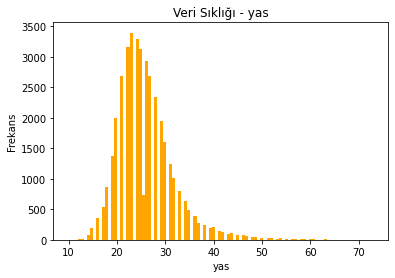

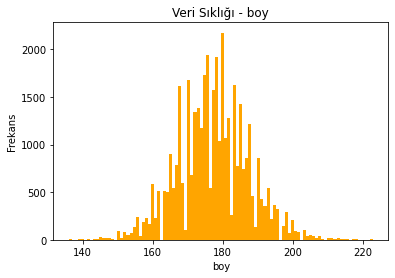

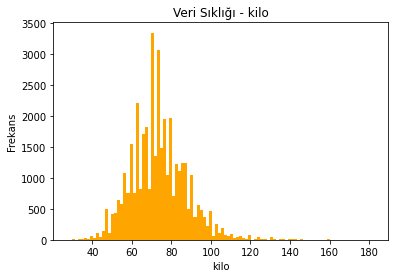

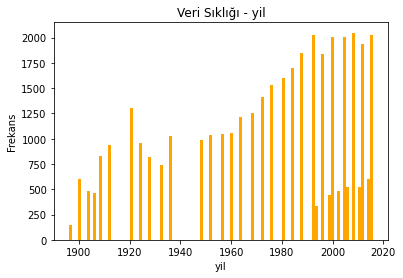

In [17]:
# Tüm sayısal değişkenler için histogramların çizilmesi
sayisal_degisken = ["yas","boy","kilo","yil"]
for i in sayisal_degisken:
  plot_histogram(i)


*   Boy verisi gauss dağılıma yakındır.


*   Yaş verilerinde çarpıklık göze çarpmakta. Uç değer olarak 60+ yaşlar göze çarpmakta.(Grafik üzerinden gözlemsel olarak)


*   Yıl grafiğinda, birinci ve ikinci dünya savaşı sebebiyle o yıllarda verilerde eksiklik göze çarpmakta.




In [18]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000




*   En yüksek yaş'a sahip kişinin 73 yaşında olduğunu görüyoruz.
*   Olimpiyatlarda, madalya kazanan insanlar ortalama olarak 20 ila 32 yaş arasında yoğunluklu olarak madalya kazanmışlar. Yine madalya kazanan sporcular'ın ortalama olarak boyları 167-187 arasında.




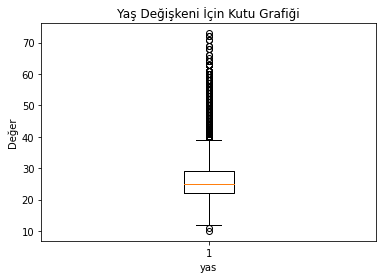

In [19]:
plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni İçin Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel("Değer")
plt.show()



*   10 yaşlarında madalya kazanan sporcular mevcut, 40+ yaş madalya kazanan sporcular bunlar aykırı değerler.



In [20]:
# Çubuk grafiklerinin çizilmesi için fonksiyonun yazılması
def plot_bar(degisken, n = 5):
  """
    Girdi: Değişken/sütun ismi
           n = Gösterilecek eşsiz değer sayısı
    Çıktı: Çubuk Grafiği
  """

  veri_ = veri[degisken]
  veri_sayma = veri_.value_counts()
  veri_sayma = veri_sayma[:n]
  plt.figure(figsize=(15,10))
  plt.bar(veri_sayma.index, veri_sayma, color = "orange")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation=15)
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı - {}".format(degisken))
  plt.show()
  print("{}: \n {}".format(degisken, veri_sayma))

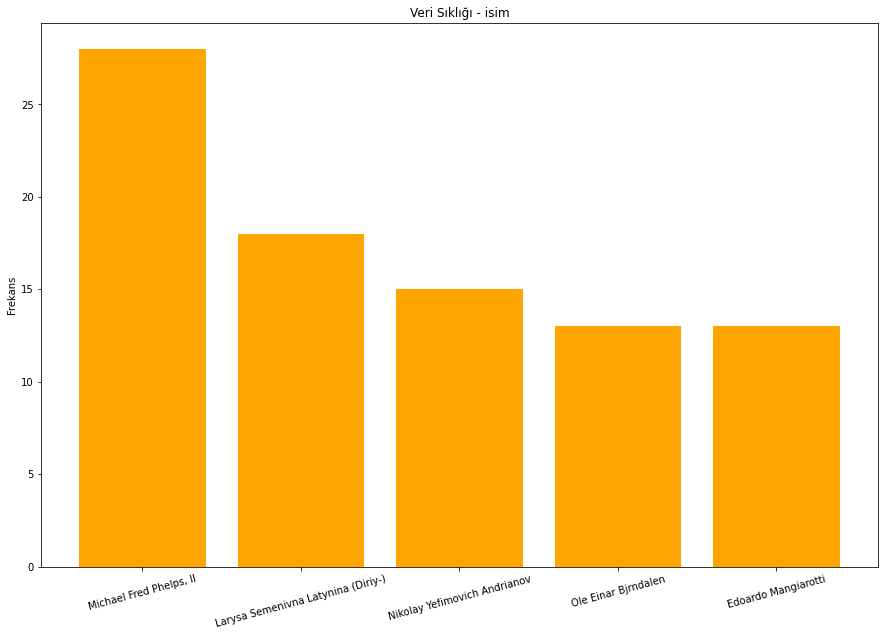

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


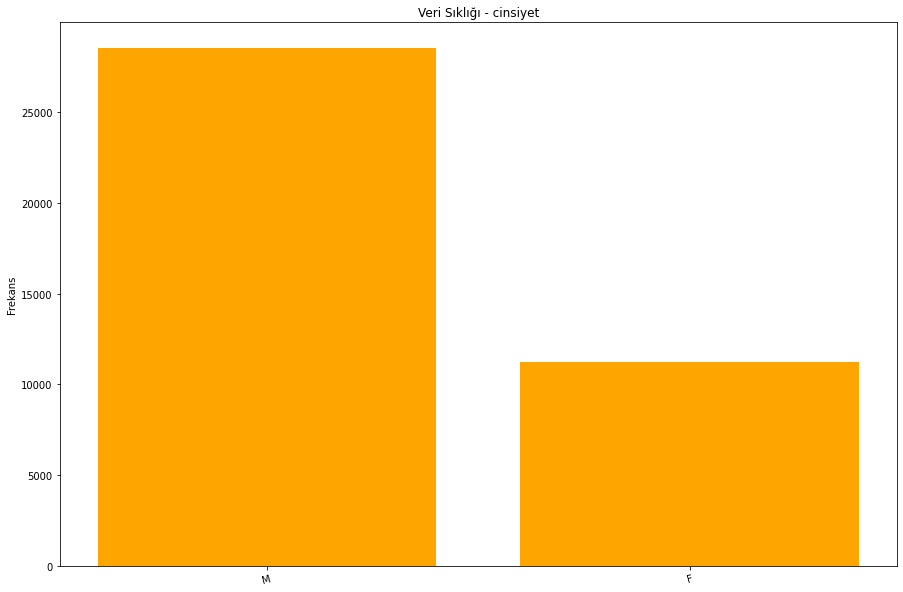

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


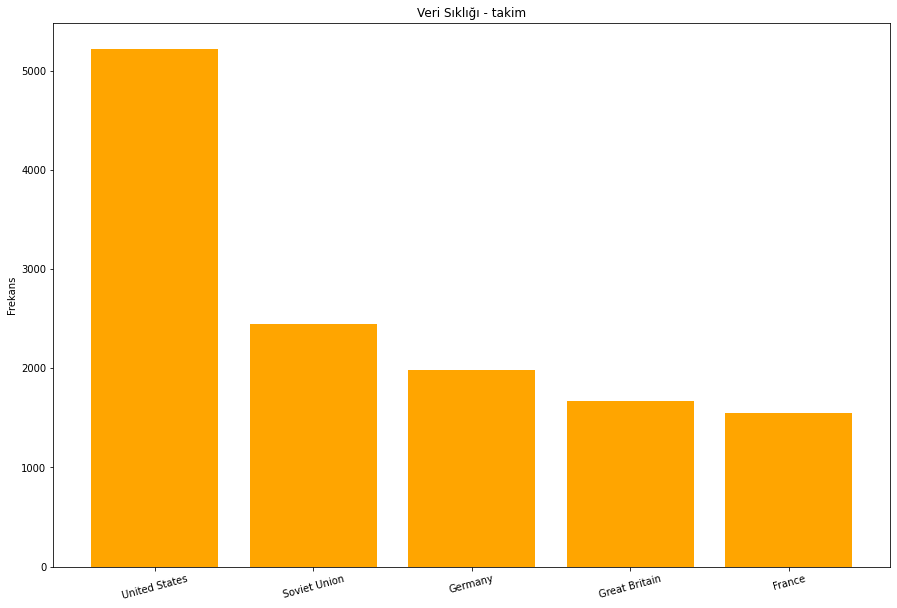

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


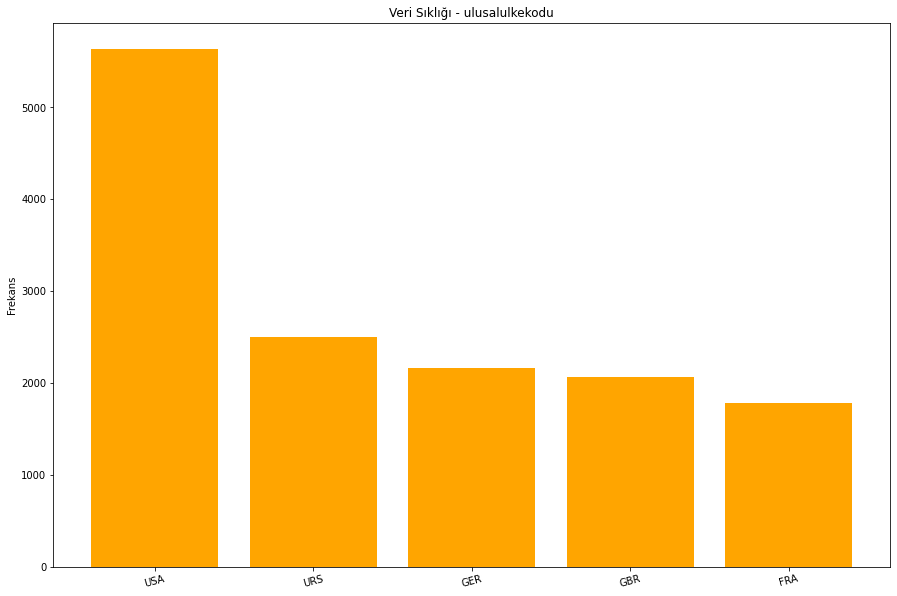

ulusalulkekodu: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: ulusalulkekodu, dtype: int64


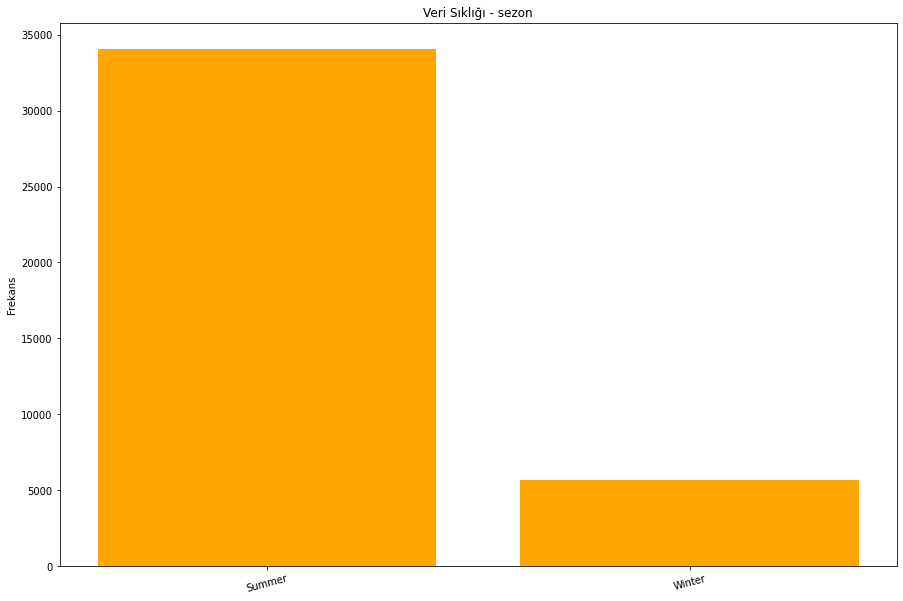

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


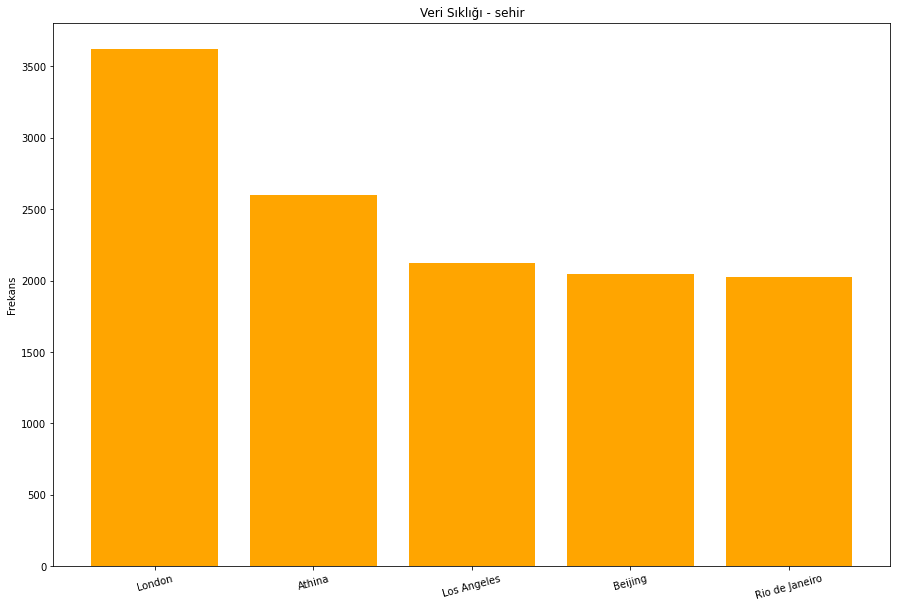

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


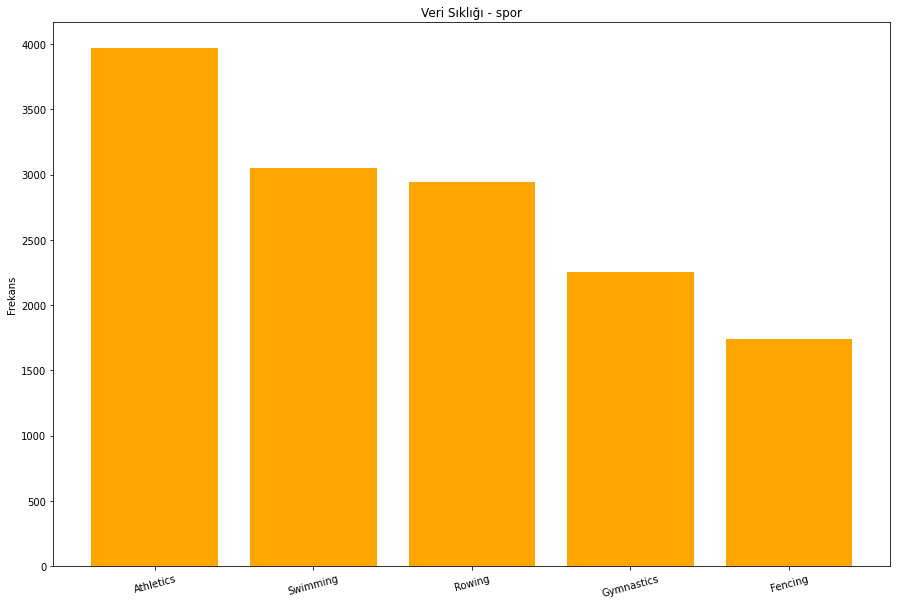

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


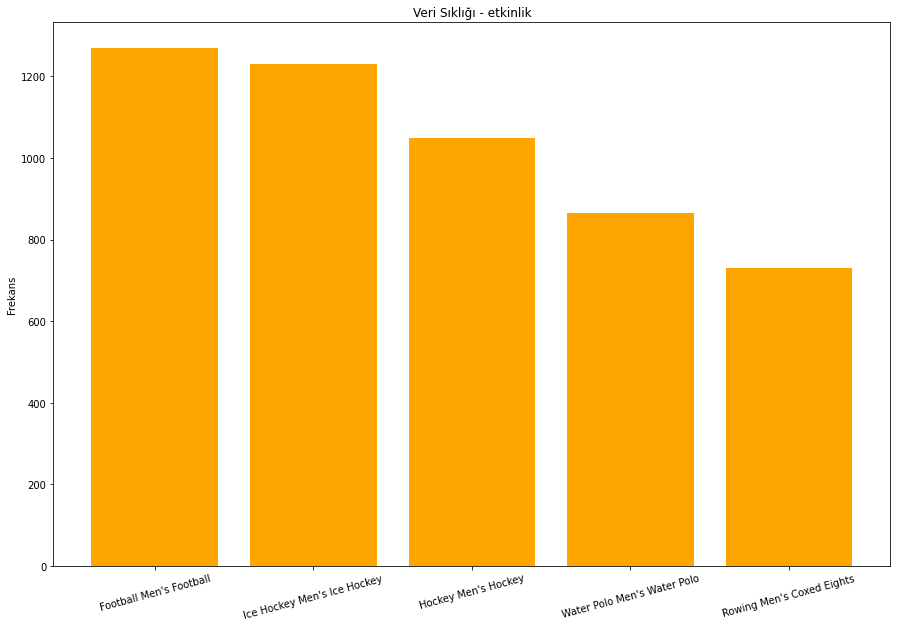

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


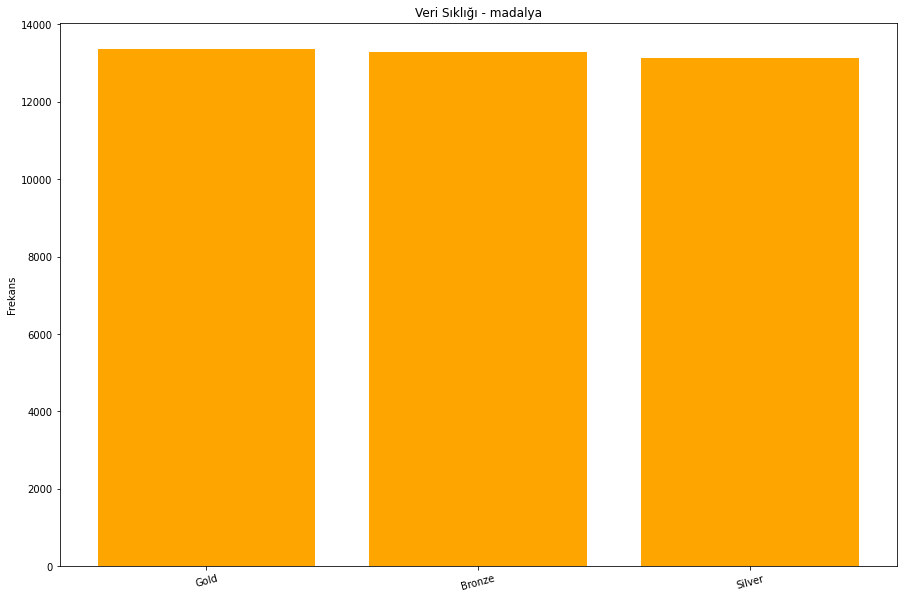

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [21]:
kategorik_degisken = ["isim",
                      "cinsiyet",
                      "takim",
                      "ulusalulkekodu",
                      "sezon",
                      "sehir",
                      "spor",
                      "etkinlik",
                      "madalya"]
for i in kategorik_degisken:
  plot_bar(i)

**Cinsiyete Göre Boy ve Ağırlık Karşılaştırılması**

In [22]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [23]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


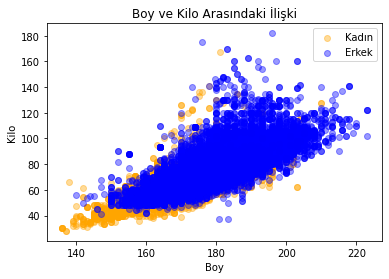

In [24]:
plt.figure()
# Renk seçiminde, kolay okunma için cinsiyetler açısından
# alışılagelmiş renkler seçilmiştir.
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.4, label = "Kadın",
            color = "orange")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = "Erkek",
            color = "blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()



*   Kadın erkek fark etmeksizin boy ve kilo arasında pozitif bir korelasyon mevcuttur. Tabii ki bu çıkarıma aykırı değerler mevcuttur. Noktalar çok iç içe olduğundan Contour Plot kullanılabilir.



**Sayısal Sütunlar Arasında İlişki İncelemesi**

In [25]:
veri.loc[:,["yas","boy","kilo"]].corr() # Korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000




*   Boy ve Kilo arasında güçlü bir korelasyon mevcuttur.




**Madalya ve Yaş Arasındaki İlişki**

In [26]:
# sporcularımızı altın, gümüş ve bronz madalya'ya göre sınıflandıralım.
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=["madalya"])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [27]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


**Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları**

In [28]:
veri_gecici[["takim", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(
    ["takim"], as_index=False).sum().sort_values(
        by="madalya_Gold", ascending=False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


**Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı**




In [29]:
veri_gecici[["sehir", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(
    ["sehir"], as_index = False).sum().sort_values(
        by="madalya_Gold", ascending=False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


**Cinsiyete Göre Kazanılan Madalya Sayıları ve Çeşitleri**



In [30]:
veri_gecici[["cinsiyet", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(
    ["cinsiyet"], as_index = False).sum().sort_values(
        by="madalya_Gold", ascending=False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# Çok Değişkenli Veri Analizi

In [31]:
veri_pivot = veri.pivot_table(index="madalya",columns = "cinsiyet",
                              values = ["boy","kilo","yas"],
                              aggfunc={"boy":np.mean,"kilo":np.mean,
                                       "yas":[min,max,np.std]})
veri_pivot.head()

boy                   kilo  ...   yas                    
                mean                   mean  ...   min       std          
cinsiyet           F           M          F  ...     M         F         M
madalya                                      ...                          
Bronze    170.003227  180.045806  62.757125  ...  10.0  5.329229  5.870340
Gold      170.448727  180.318906  63.199349  ...  13.0  5.219615  5.987807
Silver    170.233783  180.053626  62.866892  ...  13.0  5.253111  6.098221

[3 rows x 10 columns]

# Anomali Tespiti

In [32]:
def anomali_tespiti(df,ozellik):
  outlier_indices = []

  for c in ozellik:
    # 1. çeyrek
    Q1 = np.percentile(df[c],25)
    # 3.çeyrek
    Q3 = np.percentile(df[c],75)
    # IQR = Inter Quartile Range
    IQR = Q3 - Q1
    # Aykırı değer için ek adım miktarı
    outlier_step = 1.5 * IQR
    # Aykırı değeri ve bulunduğu indeksin tespiti
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
    # Tespit edilen indekslerin depolanması
    outlier_indices.extend(outlier_list_col)

  # Eşsiz aykırı değerlerin bulunması
  outlier_indices = Counter(outlier_indices)
  # Eğer bir örnek v adet sütunda farklı değer ise, aykırı değerdir.
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
  return multiple_outliers                  

In [33]:
veri_anomali = veri.loc[anomali_tespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64


*   En aykırı değerler Basketbol için çıktı muhtemelen boylarının yüksek olmasından dolayı.


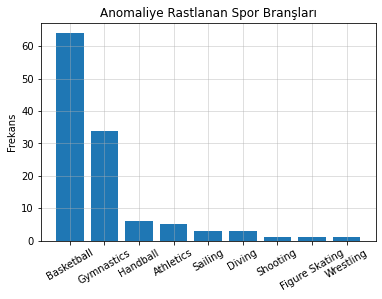

In [34]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha = 0.5)
plt.show()

In [35]:
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [36]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64



*   Jimnastikte meydana gelen anomali sonucunda veriyi incelediğimizde anomalinin nedeni sporcuların yaşlarının küçük ve kilolarının az olmasından kaynaklıdır.
*   Ayrıca jimnastikte meydana gelen anomalilerin hepsi kadın sporcular tarafından gerçekleştirilmiştir.



In [37]:
veri_basketbol = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [38]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64



*   Basketbol oynayan erkek oyuncuların boylarının uzun ve kilolarının fazla olmasından dolayı anomali tespit edilmiştir.





---



# Zaman Serilerinde Analiz
*   Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi
*   Yıllara Göre Madalya Sayıları




In [39]:
veri_zaman = veri.copy()
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [40]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [41]:
sirali_array = np.sort(veri_zaman.yil.unique())
sirali_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

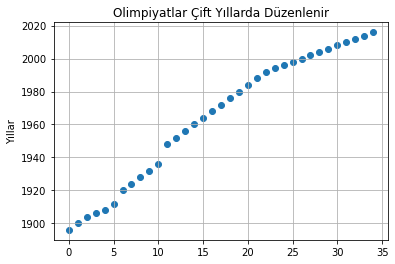

In [42]:
plt.figure()
plt.scatter(range(len(sirali_array)), sirali_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()



> Yaz ve Kış olimpiyatları ayrıldığından, eğimde düşüş gözlemliyoruz



In [43]:
# veri içerisinde bulunan yılların datetime'a dönüştürülmesi
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yil"], format = "%Y")
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(5)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
40   2014-01-01
41   1948-01-01
Name: yil, dtype: datetime64[ns]

In [44]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014-01-01
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948-01-01


In [46]:
# veri_zaman değişkeninin ana indeksini, datetime tipi olan tarih_saat değerine güncellenmesi.
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"], axis = 1, inplace = True)


In [47]:
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


**Yıllara Göre Ortalama, Yaş ve Kilo Değişimi**

In [51]:
# 2 yıllık periyotlar halinde
periyodik_veri = veri_zaman.resample("2A").mean()
periyodik_veri.head()


,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [52]:
periyodik_veri.tail()

,yas,boy,kilo
tarih_saat,,,
2008-12-31,26.046875,178.299761,74.263145
2010-12-31,26.723077,175.759615,72.840615
2012-12-31,26.066461,178.305755,73.726399
2014-12-31,26.644891,175.353434,71.756499
2016-12-31,26.325260,178.371740,73.963772


In [53]:
# Kayıp verilerin çıkarılması
periyodik_veri.dropna(axis=0, inplace = True)
periyodik_veri.head(4)

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183


<Figure size 432x288 with 0 Axes>

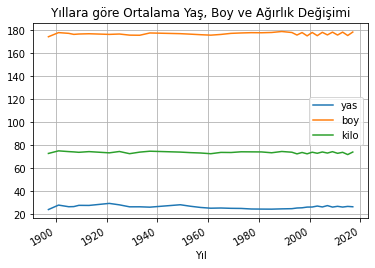

In [61]:
plt.figure()
periyodik_veri.plot();
plt.title("Yıllara göre Ortalama Yaş, Boy ve Ağırlık Değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show();

**Yıllara Göre Madalya Sayıları**

In [62]:
veri_zaman = pd.get_dummies(veri_zaman, columns = ["madalya"])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,ulusalulkekodu,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [67]:
periyodik_veri = veri_zaman.resample("2A").sum()
# Kayıp verileri çıkaralım
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

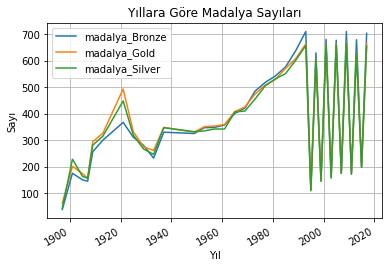

In [69]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()



*   2000'li yıllardan sonra görülen dalgalanmalar artmıştır. Bunun nedeni yaz ve kış olimpiyatlarında yapılan etkinlik sayısının buna karşılık gelen madalya sayısının farklılığından ileri gelmektedir.

